# 気象庁のデータを用いたPCA(主成分分析)
気象庁(https://www.data.jma.go.jp/obd/stats/etrn/index.php)のデータより，過去の横浜におけるデータを取得した．具体的には以下の通り．
- 2014年から2016年の間の6月から10月のデータを取得
- 平均気温
- 降水量
- 日照時間
- 平均風速
- 平均湿度

csvファイルをまず成型する．
読み込むためにpandasを使う．ほかにも今後，sklearn,matplotlib,seabornを利用するがそれは適宜インポートしていく．

In [2]:
import pandas as pd

weather_data = pd.read_csv("data.csv")

weather_data.head(10)

,,,,,,,,,,,,,,,,,�_�E�����[�h���������F2023/04/20 09:33:45
NaN,���l,���l,���l,���l,���l,���l,���l,���l,���l,���l,���l,���l,���l,���l,���l,���l,���l
�N����,���ϋC��(��),���ϋC��(��),���ϋC��(��),�~���ʂ̍��v(mm),�~���ʂ̍��v(mm),�~���ʂ̍��v(mm),�~���ʂ̍��v(mm),���Ǝ���(����),���Ǝ���(����),���Ǝ���(����),���Ǝ���(����),���ϕ���(m/s),���ϕ���(m/s),���ϕ���(m/s),���ώ��x(��),���ώ��x(��),���ώ��x(��)
NaN,NaN,�i�����,�ώ��ԍ�,NaN,���ۂȂ����,�i�����,�ώ��ԍ�,NaN,���ۂȂ����,�i�����,�ώ��ԍ�,NaN,�i�����,�ώ��ԍ�,NaN,�i�����,�ώ��ԍ�
2014/6/1,23.7,8,1,0,1,8,1,13.1,0,8,1,2.8,8,1,72,8,1
2014/6/2,24.0,8,1,0,1,8,1,12.4,0,8,1,2.4,8,1,73,8,1
2014/6/3,22.8,8,1,0,1,8,1,8.2,0,8,1,2.5,8,1,75,8,1
2014/6/4,23.1,8,1,0,1,8,1,8.6,0,8,1,2.6,8,1,71,8,1
2014/6/5,20.3,8,1,24.0,0,8,1,0.0,0,8,1,3.3,8,1,84,8,1
2014/6/6,19.6,8,1,155.0,0,8,1,0.0,0,8,1,3.7,8,1,96,8,1
2014/6/7,18.1,8,1,78.0,0,8,1,0.0,0,8,1,4.6,8,1,97,8,1


まずデータの成型，初めの五行は余計(indexなどが日本語で入ってるので文字化けしている)なので消去

データは年月日，平均気温，品質，均質情報，降水量の合計，品質情報，均質番号，日照時間，現象なし情報，品質情報，均質情報，平均風速，品質情報，均質情報，平均湿度，品質情報，均質情報
となっている．
品質情報などは主成分分析に用いないため，消去しよう．

In [3]:
weather_data = pd.read_csv("data.csv",skiprows=5)
weather_data = weather_data.iloc[:,[1,4,8,12,15]]
#欠損地のある行を削除
weather_data = weather_data.dropna()


#初めの1列目にインデックスを入れる，気温，降水量，日照時間，風速，湿度

weather_data.columns = ["temperature","precipitation","sunshine","wind","humidity"]


#10行だけ表示
weather_data.head(10)




,temperature,precipitation,sunshine,wind,humidity
0,24.0,0.0,12.4,2.4,73
1,22.8,0.0,8.2,2.5,75
2,23.1,0.0,8.6,2.6,71
3,20.3,24.0,0.0,3.3,84
4,19.6,155.0,0.0,3.7,96
5,18.1,78.0,0.0,4.6,97
6,20.3,0.0,0.1,3.3,89
7,22.7,0.0,7.8,2.2,83
8,23.2,3.5,6.7,2.3,82
9,21.4,25.5,0.0,2.2,94


In [4]:
#新しいCSVとして保存する
weather_data.to_csv("weather_data.csv")

## それぞれのデータ間の関係を見てみる
まずは，それぞれのデータ間の関係を見てみよう．それぞれのデータ間の相関関係を出力してみた．

   temperature  precipitation  sunshine  wind  humidity
0         24.0            0.0      12.4   2.4        73
1         22.8            0.0       8.2   2.5        75
2         23.1            0.0       8.6   2.6        71
3         20.3           24.0       0.0   3.3        84
4         19.6          155.0       0.0   3.7        96
               temperature  precipitation  sunshine      wind  humidity
temperature       1.000000      -0.288835  0.560594  0.161144 -0.303192
precipitation    -0.288835       1.000000 -0.364178  0.126720  0.462929
sunshine          0.560594      -0.364178  1.000000  0.124952 -0.677712
wind              0.161144       0.126720  0.124952  1.000000 -0.085456
humidity         -0.303192       0.462929 -0.677712 -0.085456  1.000000


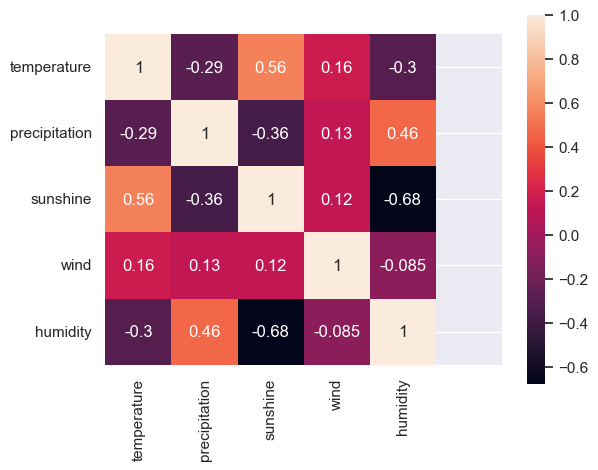

In [5]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
# CSVファイルを読み込む
weather_data = pd.read_csv("weather_data.csv", index_col=0)
#はじめの5行を表示
print(weather_data.head(5))

#各データ間の相関係数を求めてみる
cor_table = weather_data.corr()

print(cor_table)

sns.heatmap(cor_table, square=True, annot=True)
plt.xlim([0, 6])
plt.savefig("result.png")